In [ ]:
'''
 @file Campbell_HW1.ipynb
 @author Kiersten Campbell (kscamp3@emory.edu)
 @version 0.1
 @date 2023-11-05
 
 Implementation of a basic SIR model to illustrate pandemic spread
'''

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'''
Runs a basic SIR model for pandemic spread. Outputs include the number of time steps run and three arrays containing
the proportion of the population in the susceptible (S), infected (I), and recovered (R) groups at each timestep

    @param s: starting number of susceptible individuals
    @param i: starting number of infected individuals
    @param r: starting number of infected individuals
    @param beta: transmission rate
    @param gamma: recovery rate
    @param time: number of days to simulate
    @param dt: length of timestep
'''

def sir_model(s, i, r, beta, gamma, time, dt):
    total_pop = s + i + r
    steps = round(time/dt)
    
    s_all = [0 for i in range(0, steps)]
    i_all = [0 for i in range(0, steps)]
    r_all = [0 for i in range(0, steps)]
    
    s_all[0] = s/total_pop
    i_all[0] = i/total_pop
    r_all[0] = r/total_pop
    
    for i in range(0, steps-1):
        
        s_all[i+1] = s_all[i] + (-1 * beta * s_all[i] * i_all[i])*dt
            
        i_all[i+1] = i_all[i] + ((beta * s_all[i] * i_all[i]) - (gamma*i_all[i]))*dt
            
        r_all[i+1] = r_all[i] + (gamma*i_all[i])*dt
    
    return steps, s_all, i_all, r_all

Text(0.5, 1.0, 'SIR Simulation (Beta = 0.3; Gamma = 0.1)')

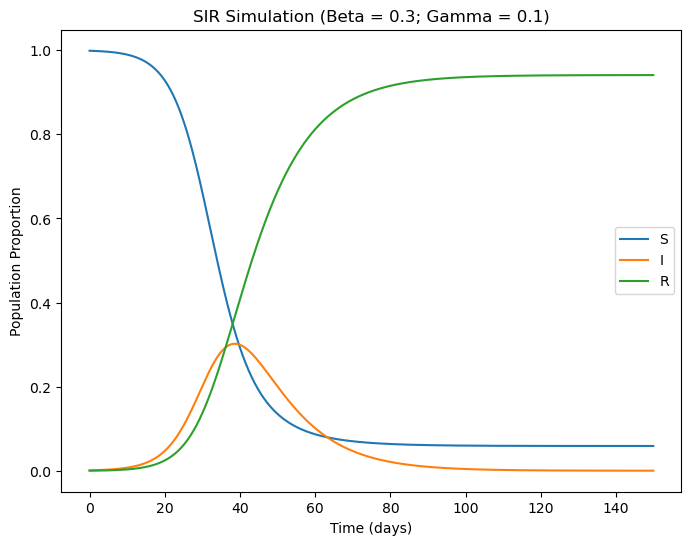

In [3]:
# Model 150 days of pandemic, starting with 999 S, 1 I, and 0 R
# Beta = 0.3; gamma = 0.1
results = sir_model(999, 1, 0, 0.3, 0.1, 150, 0.1)

plt.figure(figsize=(8, 6))
time = [i*0.1 for i in range(0, results[0])]
sns.lineplot(x=time, y=results[1], label = 'S')
sns.lineplot(x=time, y=results[2], label = 'I')
sns.lineplot(x=time, y=results[3], label = 'R')
plt.xlabel("Time (days)")
plt.ylabel("Population Proportion")
plt.title("SIR Simulation (Beta = 0.3; Gamma = 0.1)")

Text(0.02, 0.5, 'Population Proportion')

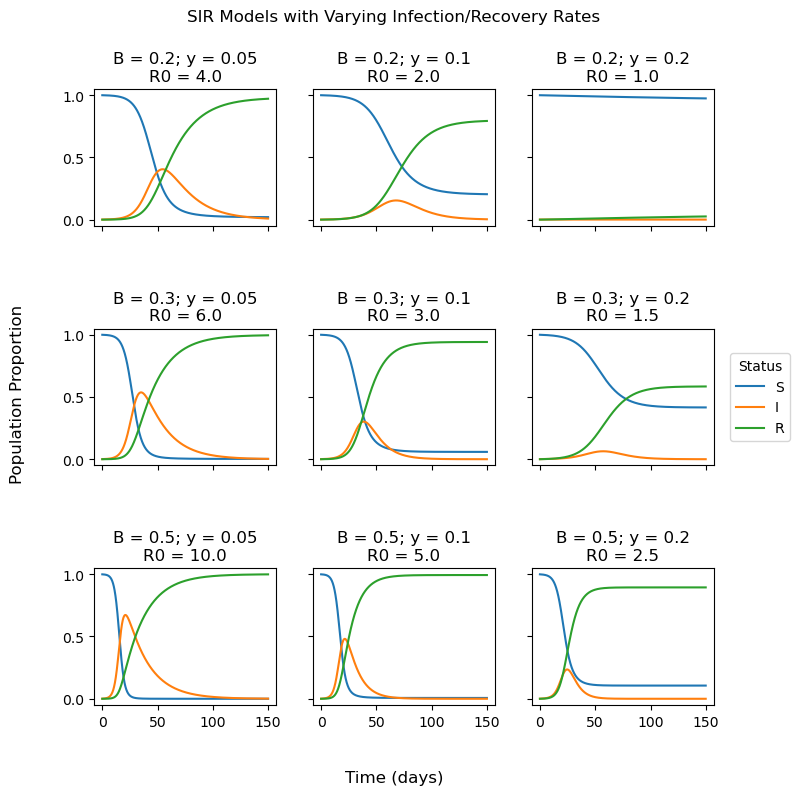

In [53]:
# Simulate model with differing recovery & infection rates to assess impact on pandemic dynamics
betas = [0.2, 0.3, 0.5]
gammas = [0.05, 0.1, 0.2]

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8,8))

for i in range(0,3):
    for j in range(0,3):
        beta = betas[i]
        gamma = gammas[j]
        
        results = sir_model(999, 1, 0, beta, gamma, 150, 0.1)
        
        time = [i*0.1 for i in range(0, results[0])]
        sns.lineplot(x=time, y=results[1], label = 'S', ax=ax[i][j], legend = False)
        sns.lineplot(x=time, y=results[2], label = 'I', ax=ax[i][j], legend = False)
        sns.lineplot(x=time, y=results[3], label = 'R', ax=ax[i][j], legend = False)
        
        ax[i][j].title.set_text("B = {0}; y = {1}\nR0 = {2}".format(beta, gamma, round(beta/gamma, 2)))

# Add global figure annotations
h, l = ax[0][1].get_legend_handles_labels()
fig.subplots_adjust(hspace=0.75)
plt.figlegend(h,l, loc = 'center right', title = "Status")
fig.suptitle("SIR Models with Varying Infection/Recovery Rates")
fig.supxlabel("Time (days)")
fig.supylabel("Population Proportion")